<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/ML2project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [365]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Mall_Customers.csv"

Mall_c = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "vjchoudhary7/customer-segmentation-tutorial-in-python",
  file_path)

print(Mall_c.head())

<ipython-input-365-f94d31986fc5>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  Mall_c = kagglehub.load_dataset(


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [366]:
Mall_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [367]:
Mall_c.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [368]:
Mall_c=Mall_c.drop(['CustomerID'],axis=1)
print(Mall_c.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [369]:
from sklearn.preprocessing import OrdinalEncoder

gender_encoder = OrdinalEncoder()
Mall_c[['Gender']] = gender_encoder.fit_transform(Mall_c[['Gender']])

print(Mall_c.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0     1.0   19                  15                      39
1     1.0   21                  15                      81
2     0.0   20                  16                       6
3     0.0   23                  16                      77
4     0.0   31                  17                      40


In [370]:
Mall_c['diff_income_spending'] = Mall_c['Annual Income (k$)'] - Mall_c['Spending Score (1-100)']
print(Mall_c)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0       1.0   19                  15                      39   
1       1.0   21                  15                      81   
2       0.0   20                  16                       6   
3       0.0   23                  16                      77   
4       0.0   31                  17                      40   
..      ...  ...                 ...                     ...   
195     0.0   35                 120                      79   
196     0.0   45                 126                      28   
197     1.0   32                 126                      74   
198     1.0   32                 137                      18   
199     1.0   30                 137                      83   

     diff_income_spending  
0                     -24  
1                     -66  
2                      10  
3                     -61  
4                     -23  
..                    ...  
195                    41  
196    

In [371]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

columns = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age','diff_income_spending']
Mall_c_scale = Mall_c[columns]
Mall_c_gender = Mall_c[['Gender']]

scaler = StandardScaler()
Mall_data = scaler.fit_transform(Mall_c_scale)
scaled_df = pd.DataFrame(Mall_data,columns=columns)

Mall_data = pd.concat([Mall_c_gender.reset_index(drop=True), scaled_df], axis=1)
print(Mall_data.head())


   Gender  Annual Income (k$)  Spending Score (1-100)       Age  \
0     1.0           -1.738999               -0.434801 -1.424569   
1     1.0           -1.738999                1.195704 -1.281035   
2     0.0           -1.700830               -1.715913 -1.352802   
3     0.0           -1.700830                1.040418 -1.137502   
4     0.0           -1.662660               -0.395980 -0.563369   

   diff_income_spending  
0             -0.939858  
1             -2.088694  
2             -0.009847  
3             -1.951928  
4             -0.912504  


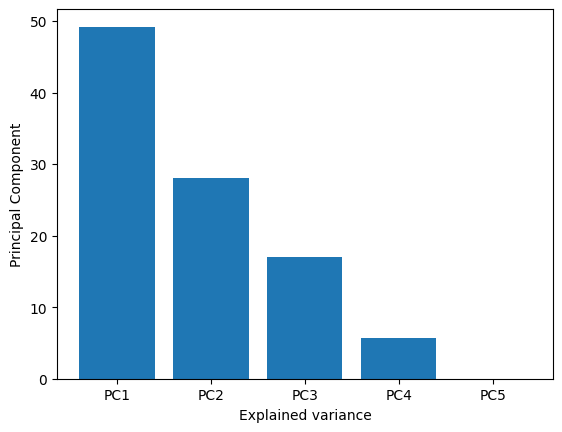

In [372]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
PCA_Mall = pca.fit_transform(Mall_data)

#Analyze explained variance

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

#print(cumulative_variance)

per_var = np.round(pca.explained_variance_ratio_ * 100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1) , height=per_var, tick_label=labels)
plt.xlabel('Explained variance')
plt.ylabel('Principal Component')
plt.show()

In [373]:
#Choose the minimum number of components preserving 90–95% variance


condition = (cumulative_variance >= 0.90) & (cumulative_variance<= 0.95)
n_components = np.argmax(condition)

print(f"the minimum number of components preserving 90–95% variance: {n_components}")

pca_reduced = PCA(n_components=n_components)
x_pca_reduced = pca_reduced.fit_transform(Mall_data)


the minimum number of components preserving 90–95% variance: 2


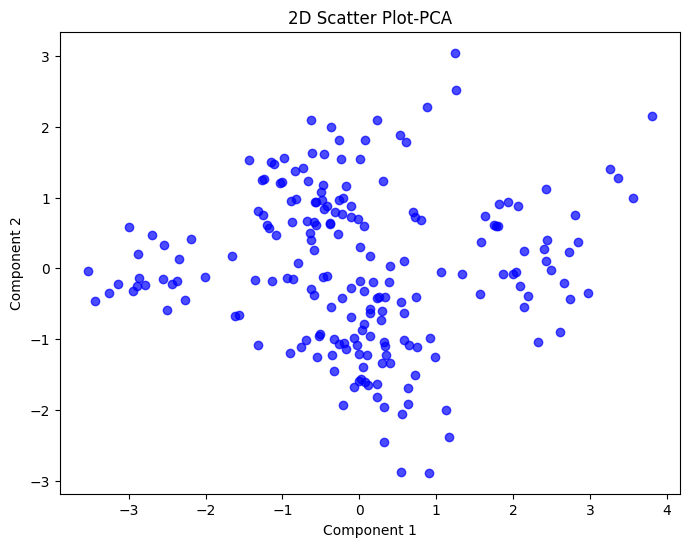

In [374]:
#Visualize reduced space (2D scatter plots)
import seaborn as sns

plt.figure(figsize=(8,6))
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], alpha=0.7, c='blue')
plt.title('2D Scatter Plot-PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


In [375]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=42)

TSNE_Mall = tsne.fit_transform(Mall_data)

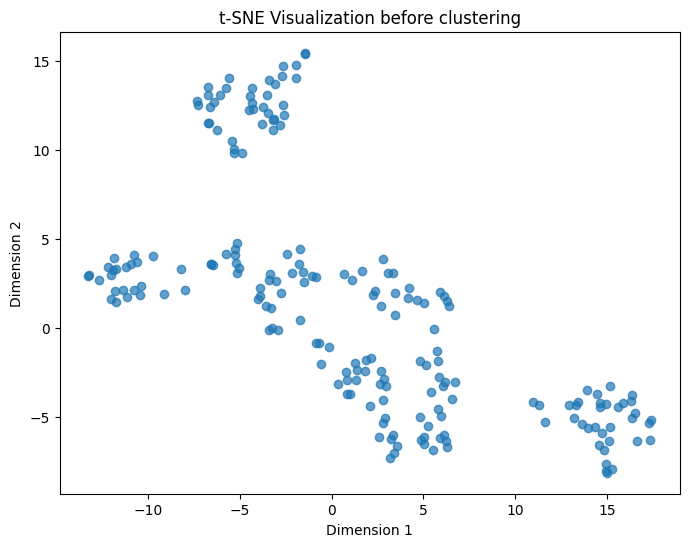

In [376]:
import matplotlib.pyplot as plt
TSNE_df = pd.DataFrame(TSNE_Mall, columns=['Dim1', 'Dim2'])

TSNE_df['Gender'] = Mall_data['Gender'].values


plt.figure(figsize=(8,6))
plt.scatter(TSNE_df['Dim1'], TSNE_df['Dim2'], alpha=0.7)
plt.title('t-SNE Visualization before clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.show()

In [377]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(Mall_data)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

print(inertias)

[849.2799999999995, 584.1245207993252, 414.95220501380606, 313.9731188655859, 250.95018076162214, 216.11108764177044, 200.8687961759306, 181.89197532896478, 168.42015362582256]


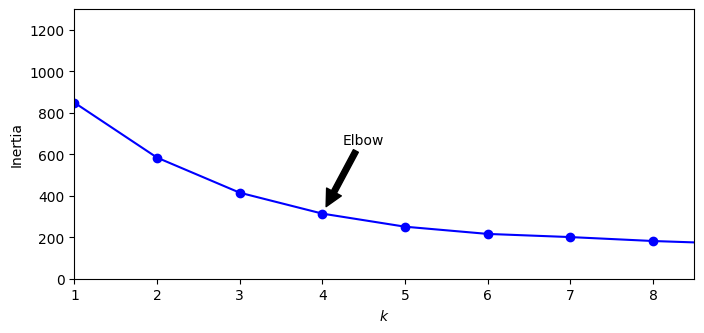

In [378]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.show()

In [379]:
import seaborn as sns

kmeans = KMeans(n_clusters=4,n_init=254,random_state=42)
kmeans_pred = kmeans.fit_predict(Mall_data)

print(kmeans_pred)

[1 1 1 1 1 1 3 1 3 1 3 1 3 1 3 1 1 1 3 1 1 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 1 1 3 1 1 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 0 3 3 3 3
 3 0 3 3 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 3 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 0 2 0 2 0 2 0 2 0 0 0 2 0 2 0 2 0 2 0 0 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


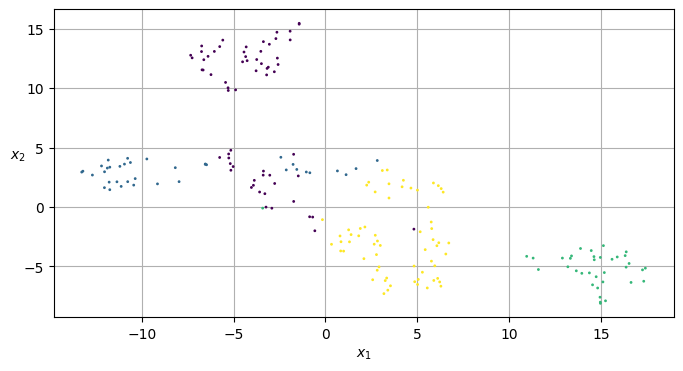

In [380]:
def plot_clusters(TSNE_Mall, y=kmeans_pred):
    plt.scatter(TSNE_Mall[:, 0], TSNE_Mall[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(TSNE_Mall)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [381]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1 and -1 not in set(labels):
        return silhouette_score(X, labels)
    else:
        return -1

dbscan_grid={'eps': [4,5,6,9,10],
    'min_samples':[20,25,30,40]}
dbscanSearch=GridSearchCV(DBSCAN(),dbscan_grid,scoring=silhouette_scorer,
                      cv=20,
                      )
dbscanSearch.fit(TSNE_Mall)
print(dbscanSearch.best_score_)
print(dbscanSearch.best_params_)

-1.0
{'eps': 4, 'min_samples': 20}


In [382]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(TSNE_Mall)

DBSCAN(min_samples=10)

In [383]:
DBSCAN_label=dbscan.labels_

no. of clusters: %d 0
 no. of noise points: 200


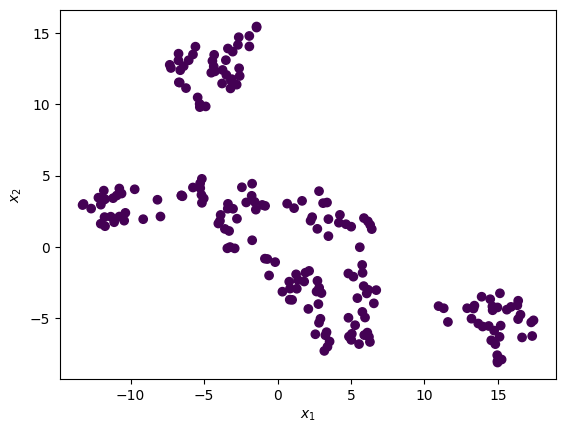

In [384]:
# Visualizing DBSCAN
plt.scatter(TSNE_Mall[:, 0], TSNE_Mall[:, 1], c=DBSCAN_label,
label=DBSCAN_label)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=DBSCAN_label
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('no. of clusters: %d' ,N_clus)

# Identify Noise
n_noise = list(DBSCAN_label).count(-1)
print(' no. of noise points:' ,  n_noise)


In [385]:
from sklearn.cluster import MiniBatchKMeans

minibatch = MiniBatchKMeans(n_clusters=4,random_state=42)
mimibatch_pred=minibatch.fit_predict(TSNE_Mall)

In [386]:
minibatch.inertia_

2312.84423828125

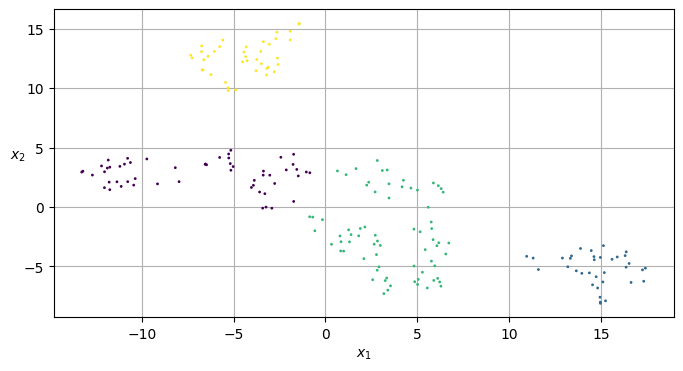

In [387]:
def plot_clusters(TSNE_Mall, y=mimibatch_pred):
    plt.scatter(TSNE_Mall[:, 0], TSNE_Mall[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(TSNE_Mall)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

Clustering with k = 20

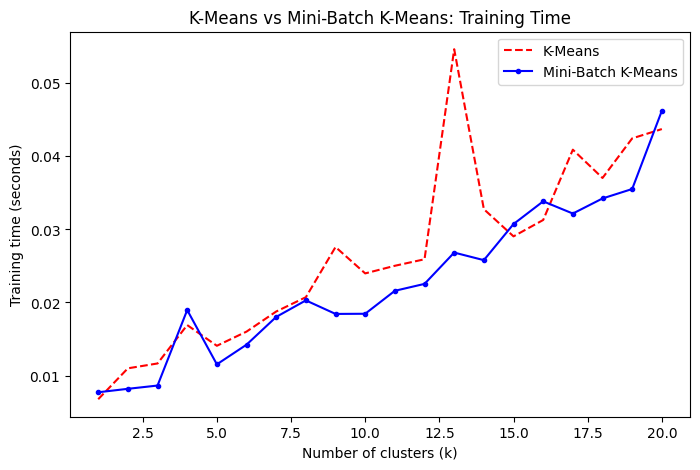

In [388]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from timeit import default_timer as timer

X = Mall_data.values

max_k = 20
times = np.empty((max_k, 2))

for k in range(1, max_k + 1):
    print(f"\rClustering with k = {k}", end="")

    # KMeans
    kmeans = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
    start = timer()
    kmeans.fit(X)
    times[k - 1, 0] = timer() - start

    # MiniBatchKMeans
    minibatch = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    start = timer()
    minibatch.fit(X)
    times[k - 1, 1] = timer() - start

plt.figure(figsize=(8, 5))
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-Batch K-Means")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Training time (seconds)")
plt.title("K-Means vs Mini-Batch K-Means: Training Time")
plt.legend()
plt.show()


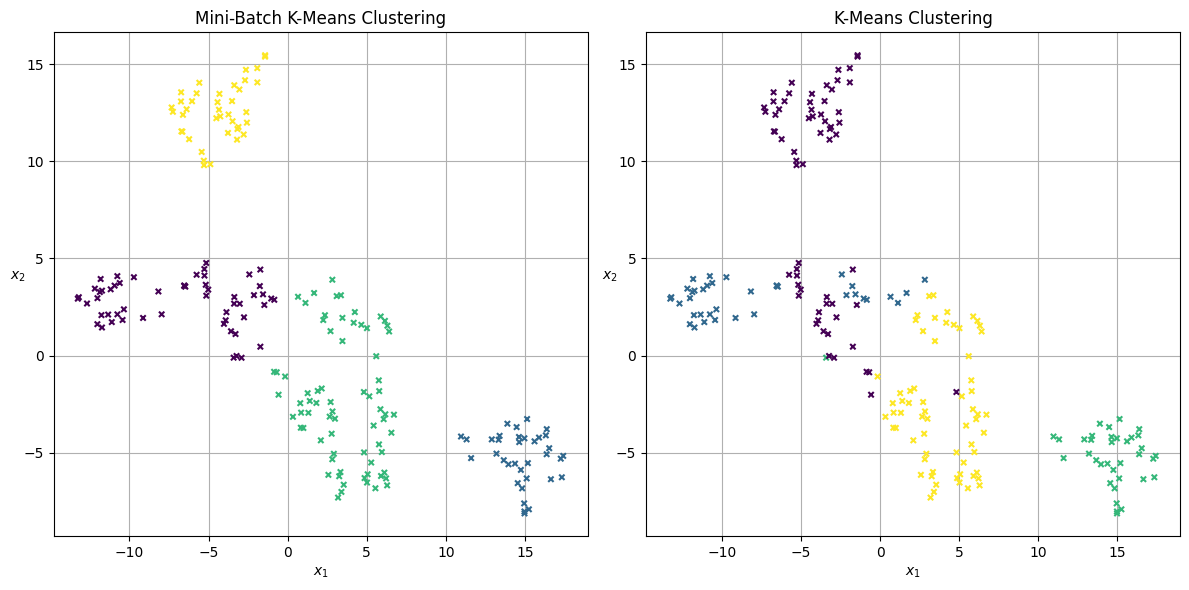

In [389]:
import matplotlib.pyplot as plt

def plot_clusters(TSNE_Mall, y, title):
    plt.scatter(TSNE_Mall[:, 0], TSNE_Mall[:, 1],marker='x' ,c=y, s=15)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.title(title)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_clusters(TSNE_Mall, y=mimibatch_pred ,title="Mini-Batch K-Means Clustering")
plt.gca().set_axisbelow(True)
plt.grid()

plt.subplot(1, 2, 2)
plot_clusters(TSNE_Mall, y=kmeans_pred ,title="K-Means Clustering")
plt.gca().set_axisbelow(True)
plt.grid()

plt.tight_layout()
plt.show()